# Revisando um pouco o curso do Datacamp

(1797, 8, 8)
(1797, 64)


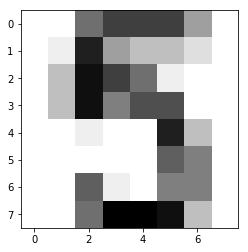

In [34]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial import distance as dst
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
#print(digits.keys())
#print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [14]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = ___________()

# Fit the classifier to the training data
knn.fit(______, ______)

# Print the accuracy
print(knn._____(X_test, y_test))

0.983333333333


Revisando um pouco com um pouco mais de detalhe o `kNN`, pode-se dizer que é um algoritmo `não paramétrico` . Ou seja, ele não faz nenhuma suposição sobre a forma da função que estamos prever. No caso, estamos trabalhando com imagens e não há nenhuma hipótese inicial sobre a forma dos nossos dados. Isso impede erros de modelagem. Por exemplo, suponha que nosso dado tem uma forma altamente `não Gaussiana`, mas o modelo de aprendizagemque escolhemos assume que nossos dados tenham uma distribuição `Gaussiana`. Isso seria meio bizarro, certo?

Além disso, é um algortimo "Instance-Based learning". Isto é, nosso algoritmo não faz nenhuma ação explícita quando aprende um modelo. Ou seja, o algoritmo faz uma "escolha" de "memorizar" os dados de treino e fazer a computação das distâncias no caso de teste.

Em outras palavras, o kNN é conhecido por ter um treino mínimo mas ter um teste pesado.

Dito isso, será que conseguimos _reproduzir_ o _kNN_ na unha?

In [21]:
def train(X_train, y_train):
    #TODO

In [29]:
def predict(X_train, y_train, x_test, k, distance_metric=dst.euclidean):
    #TODO

In [ ]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError

    # train on the input data
    train(X_train, y_train)

    # predict for each testing observation
    for i in tqdm(range(len(X_test))):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

# making our predictions 
predictions = []
try:
    kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
    print('Can\'t have more neighbors than training samples!!')

Duas coisas a se pensar: As métricas de distância e o porquê do k's

- Sobre o número de k's

Quando o número de K é pequeno, nós estamos restringindo a região para uma região específica e forçando o nosso classificador a ser mais "cego" em comparação com a distribuição total. É normal a formação de chamadas "ilhas". Um valor pequeno do K pode promover um fit mais flexível, mais complexo. Em outras palavras, nosso modelo consegue aprender bem para o caso de treino, mas falha em generalizar para casos não vistos. Assim, com um K baixo nós temos um bias baixo, mais uma variância alta. Isso pode causar o problema de overfitting

![](../data/imgs/knn2.png)

Como foi visto no curso do DataCamp, sob o pretesto de classificação, o K-NN basicamente forma um 'majoroty voting' entre os K pontos mais similares de acordo com uma métrica de distância, dado um ponto não visto. Em outras palavras, se eu tenho um ponto novo e os 5 caras mais próximos deles são azuis e 3 são vermelhos, então ele é azul.

Contudo, um valor alto de K faz com que as `decision boundary` dos nossos dados seja mais "suave" de forma que nosso modelo generalize melhor (aumentando o seu bias e reduzindo a variância), mas talvez a decision boundary fique tão "simples" que nosso modelo falhe para classificações dos dados de treino (underfitting).

![](../data/imgs/knn3.png)

![](../data/imgs/knn8.png)

- Sobre as métricas de distância

Como estamos considerando essa questão de "proximidade", há várias formas de pensarmos como a distância entre dois pontos pode ser computada já que elas podem representar diferentes formas de mostrar a similaridade entre dois pontos.

Dependendo do problema que estamos tratando, o uso de diferentes métricas de distância pode impactar até a performance do desempenho do modelo.

A mais comum é a distância L1, ou a Euclideana que nada mais é do que a ditância em uma linha reta entre dois pontos:

`scipy.spatial.distance.euclidean()`. Contudo, existem várias outras: a Hamming , que serve para diferenças categóricas; Manhattan..


O ponto é que existem várias métricas de distâncias e várias opções dependendo do seu problema.
Vocês podem ver alguns exemplos aqui:
https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance


## Cross Validation

Vimos dois exemplos de parâmetros que não são aprendidos pelo modelo: o uso de uma métrica de distiancia específica entre várias opções e o número ideal de K's. Ambos os casos são exemplos de **hiperparâmetros**. Na prática, sabemos que o melhor K é aquele que corresponde à menor taxa de erro para os nossos dados de teste.

Então uma forma da gente testar isso seria testar diferentes K's para os nossos casos de teste, certo? **Errado** !



A ideia aqui é a gente usar o nosso caso de teste para simularmos dados que nunca foram vistos. Ora, se a gente treina em cima dos dados de teste, nós estamos viciando nossos dados (e o pior, estamos treinando **usando dados de teste**) e isso é um caso claro de **overfitting**
![](../data/imgs/knn4.png)

**Usar os dados de teste é algo que só deve ser feito ao final do pipeline de treinamento, quando já escolhemos, inclusive os hiperparâmetros**.

Uma alternativa e aposta mais inteligente é fazer uma divisão a mais nos nossos dados. Nós passamos a dividir nosso conjunto de dados em três: treino, **validação** e teste. Esse conjunto de **validação** será usado para a escolha de hiperparâmetros do nosso algoritmo. Há diversas abordagens para atacar esse problema e uma das mais famosas é o _k-fold cross validation_.

![](../data/imgs/knn5.png)

Como a imagem apresentada, o k-fold cross validation divide o dataset de treinamento em k grupos ou "folds" de aproximadamente mesmo tamanho. O primeiro grupo  é tratado como dataset de validação e os outros k-1 grupos são usados para treinar. Computa-se o erro e repete-se o processo K vezes, modificando o grupo que é tratado como dataset de validação. Esse processo resulta em k resultados, cuja média é o resultado final do desempenho do modelo.

O scikit-learn já conta com esse tipo de método para fazer cross-validation, o `cross_val_score`. Nós especificamos o número de folds e nossa métrica é a acurácia já que estamos falando de classificação.

In [37]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = list(neighbors)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

100%|██████████| 25/25 [00:06<00:00,  3.56it/s]


E agora nós podemos plotar o erro para cada caso

The optimal number of neighbors is 3


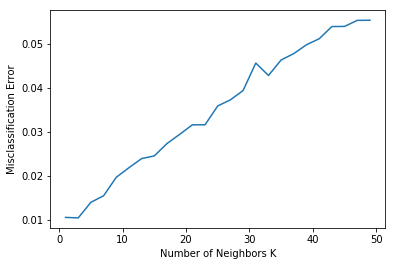

In [40]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Contudo, também tem outra estratégia muito melhor de fazermos a seleção dos hiperparâmetros ideias: o `grid search cv`, que basicamente além de fazer o cross validation, faz todas as combinações de hiperparâmetros desejada.

In [44]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'metric': ['euclidean', 'hamming'], 'n_neighbors': [1,2,3,4,5,6,7,8,9]}]

In [54]:
%%time
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'metric': 'euclidean', 'n_neighbors': 1}

Grid scores on development set:

0.990 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 1}
0.985 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 2}
0.990 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3}
0.986 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 4}
0.986 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 5}
0.987 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 6}
0.985 (+/-0.032) for {'metric': 'euclidean', 'n_neighbors': 7}
0.984 (+/-0.031) for {'metric': 'euclidean', 'n_neighbors': 8}
0.981 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 9}
0.857 (+/-0.051) for {'metric': 'hamming', 'n_neighbors': 1}
0.809 (+/-0.044) for {'metric': 'hamming', 'n_neighbors': 2}
0.857 (+/-0.035) for {'metric': 'hamming', 'n_neighbors': 3}
0.849 (+/-0.039) for {'metric': 'hamming', 'n_neighbors': 4}
0.857 (+/-0.046) for {'metric': 'hamming', 'n_neighbors': 5}
0.842